# my website:https://blog.csdn.net/Linli522362242/article/details/119902332

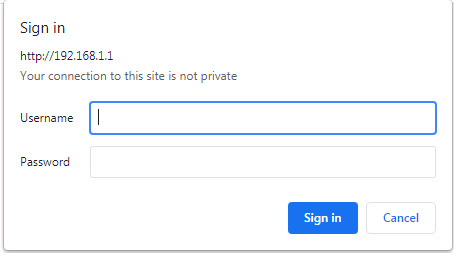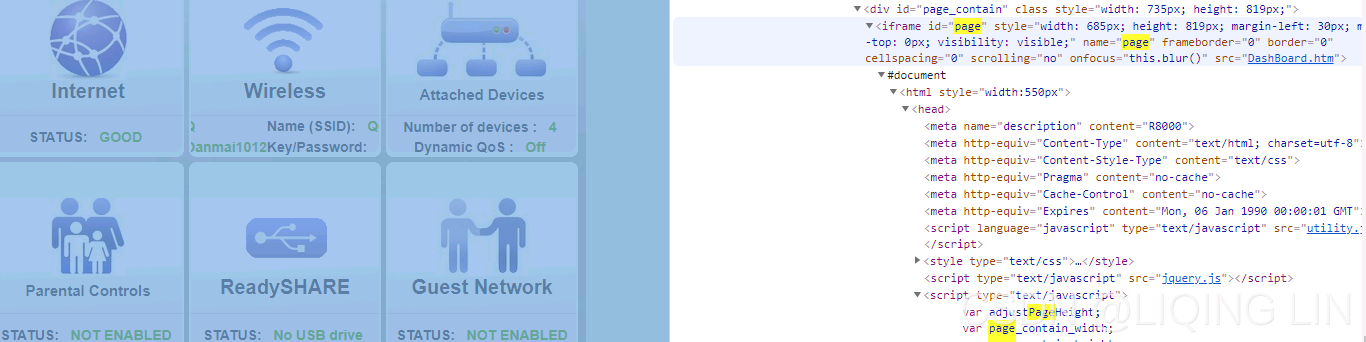

In [475]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
import win32com.client

driver = webdriver.Chrome( executable_path = "C:/chromedriver/chromedriver"
                          )

wait = WebDriverWait( driver, 2 )

username = 'admin'
password = 'LlQ54951'
url = 'http://routerlogin.net' #'http://192.168.1.1' # OR # 'http://routerlogin.net'

print(url)

wait = WebDriverWait(driver, 2)
driver.get( url ) # for netgear router
    
shell = win32com.client.Dispatch("WScript.Shell")  
shell.Sendkeys(username)
shell.SendKeys('{ENTER}')
shell.Sendkeys('{TAB}')
shell.Sendkeys(password)
shell.SendKeys('{ENTER}')

while driver.current_url == 'http://routerlogin.net/MNU_access_setRecovery_index.htm' or \
        driver.current_url == 'http://192.168.1.1/MNU_access_setRecovery_index.htm':
    driver.get( url )
    shell = win32com.client.Dispatch("WScript.Shell")  
    shell.Sendkeys(username)
    shell.SendKeys('{ENTER}')
    shell.Sendkeys('{TAB}')
    shell.Sendkeys(password)
    shell.SendKeys('{ENTER}')
    
print( driver.current_url )

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

wait.until( EC.presence_of_element_located( (By.ID, 
                                             'page_contain'
                                            ) 
                                          ) )

# since iframe id='page'
driver.switch_to.frame( driver.find_element_by_id("page") )

# OR # driver.find_element_by_xpath( '//html/body/table/tbody/tr[1]/td[3]' ).click()
driver.find_element_by_xpath( '//td[@id="AttachedDevices"]' ).click()
print( driver.current_url )

import pandas as pd
df = pd.read_html( driver.page_source, header=0)[3] # [3] the 3th table from outside, 

df= df.iloc[:,1:5]
df = df[ df['Connection Type'].str.contains("NaN")==False ]
print(df)


driver.switch_to.default_content()
driver.find_element_by_xpath('//a[@id="AdvanceTab"]').click()

driver.find_element_by_xpath('//li[@id="setup_header"]').click()
wait.until( EC.presence_of_element_located( (By.ID, 
                                             'setup_header'
                                            ) 
                                          ) )

# driver.find_element_by_xpath('//li[@id="setup_header"]/following-sibling::li[1]/ul/li[@id="LAN_set"]').click()
# OR 
# driver.find_element_by_xpath('//li[@id="LAN_set"]').click()
# OR
# note "text" is also an node, text()==> ../ ==> span ==>../ ==> a ==> ../ ==> li[@id="LAN_set"]
# driver.find_element_by_xpath('//a/span[text()="LAN Setup"]/../../../li[@id="LAN_set"]').click()
# OR
driver.find_elements_by_xpath('//a/span[text()="LAN Setup"]')[0].click() # click a

driver.switch_to.frame( driver.find_element_by_id("page2") )
# /html/body/div/form/input[12]
dhcp_start = driver.find_element_by_xpath('//input[@name="dhcp_start"]').get_attribute("value")
dhcp_end = driver.find_element_by_xpath('//input[@name="dhcp_end"]').get_attribute("value")

ip_address = driver.find_element_by_xpath('//input[@name="lan_ipaddr"]').get_attribute("value")
ip_subnet_mask = driver.find_element_by_xpath('//input[@name="lan_netmask"]').get_attribute("value")

# driver.quit()
print('DHCP start:', dhcp_start)
print('DHCP end:', dhcp_end)
print('IP Address:', ip_address)
print('IP Subnet Mask:', ip_subnet_mask)


reservation_df = pd.read_html( driver.page_source, header=0 )[2] 
reservation_df = reservation_df.iloc[:, 2:reservation_df.shape[1]]    
print(reservation_df)

driver.quit()

http://routerlogin.net
http://routerlogin.net/start.htm
http://routerlogin.net/start.htm
    Status Connection Type         Device Name   IP Address
0  Allowed   2.4G Wireless  DEFAULT192.168.1.2  192.168.1.2
2  Allowed           Wired  SLlQ-PC192.168.1.3  192.168.1.3
4  Allowed     5G Wireless        L192.168.1.4  192.168.1.4
6  Allowed     5G Wireless     iP-L192.168.1.5  192.168.1.5
DHCP start: 192.168.1.2
DHCP end: 192.168.1.254
IP Address: 192.168.1.1
IP Subnet Mask: 255.255.255.0
Empty DataFrame
Columns: [IP Address, Device Name, MAC Address]
Index: []


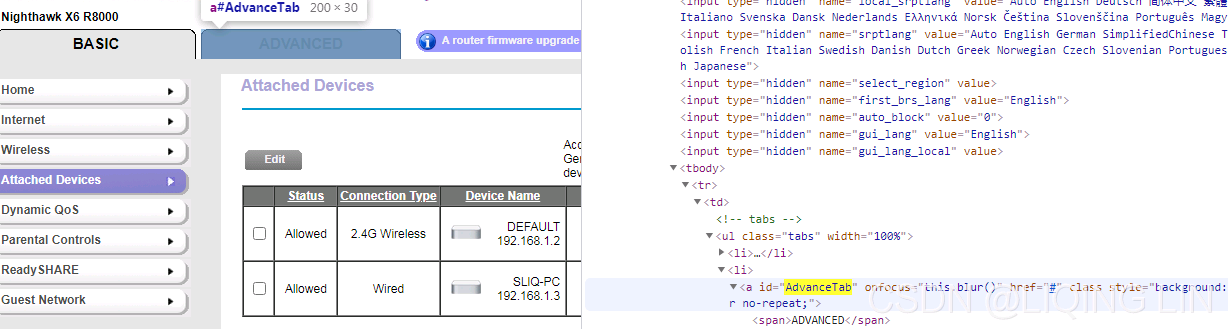

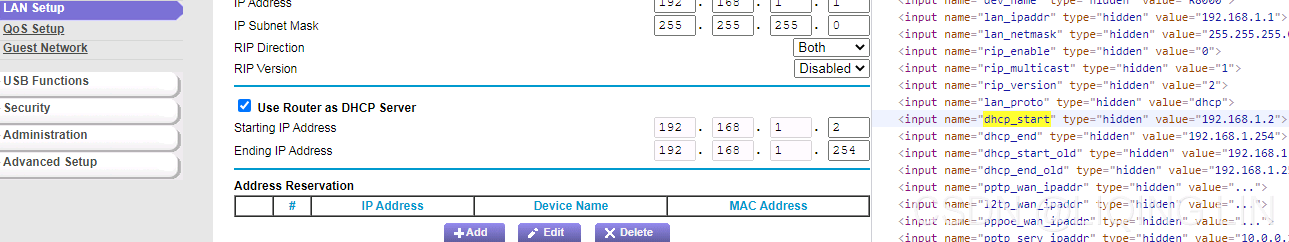

In [476]:
reservation_df['IP Address'] # if there exist a ip address

Series([], Name: IP Address, dtype: object)

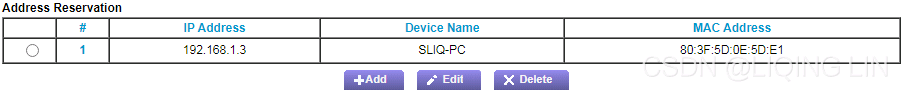

In [205]:
ip_list=df['IP Address'].to_list()
ip_list.append(ip_address) # ip_list.append('192.168.1.1')

if reservation_df.shape[0] > 0:
    for ip in reservation_df['IP Address']:
        if ip not in ip_list:
            ip_list.append(ip_list)
    
ip_list=sorted( ip_list )
ip_list

['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.4', '192.168.1.5']

In [210]:
used=[]
for ip in ip_list:
    used.append( ip.split('.')[-1] )

new_ip = np.random.randint( int( dhcp_start.split('.')[-1] ), 
                            int( dhcp_end.split('.')[-1] ) + 1,
                            size=1
                          )[0]    
while ip in used:
    new_ip = np.random.randint( int( dhcp_start.split('.')[-1] ), 
                                int( dhcp_end.split('.')[-1] ) + 1,
                                size=1
                              )[0]   
new_ip = '.'.join([ '192.168.1', str(new_ip) ])
new_ip

'192.168.1.94'

In [217]:
import re

used=[]

# ip_list = ['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.4', '192.168.1.5']
for ip in ip_list:
    used.append( re.sub( '([0-9]{1,3}.){3}', # pattern
                         '',
                         ip
                       )
               )
print(used)    

new_ip = np.random.randint( int( re.sub( '([0-9]{1,3}.){3}', # pattern
                                         '',
                                         dhcp_start,
                                       )
                               ),
                            int(  re.sub( '([0-9]{1,3}.){3}', # pattern
                                          '',
                                          dhcp_end,
                                        )
                               )+1,
                            size=1
                          )[0]    
while ip in used:
    new_ip = np.random.randint( int( re.sub( '([0-9]{1,3}.){3}', # pattern
                                             '',
                                             dhcp_start,
                                           )
                                   ),
                                int(  re.sub( '([0-9]{1,3}.){3}', # pattern
                                              '',
                                              dhcp_end,
                                            )
                                   )+1,
                                size=1
                              )[0] 
    
new_ip = '.'.join([ '192.168.1', str(new_ip) ])
new_ip

['1', '2', '3', '4', '5']


'192.168.1.215'

In [16]:
print('Network adapter detection is in progress, please wait...\n')

Network adapter detection is in progress, please wait...



# go to window's registry editor
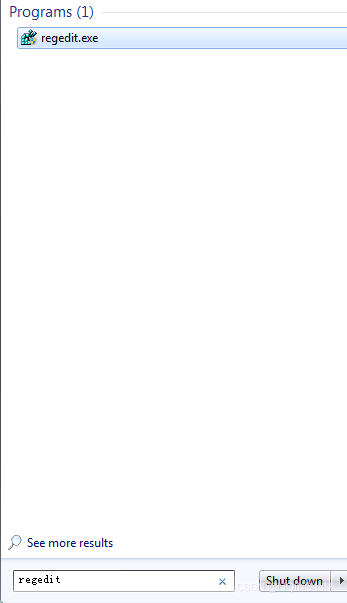
# ==>
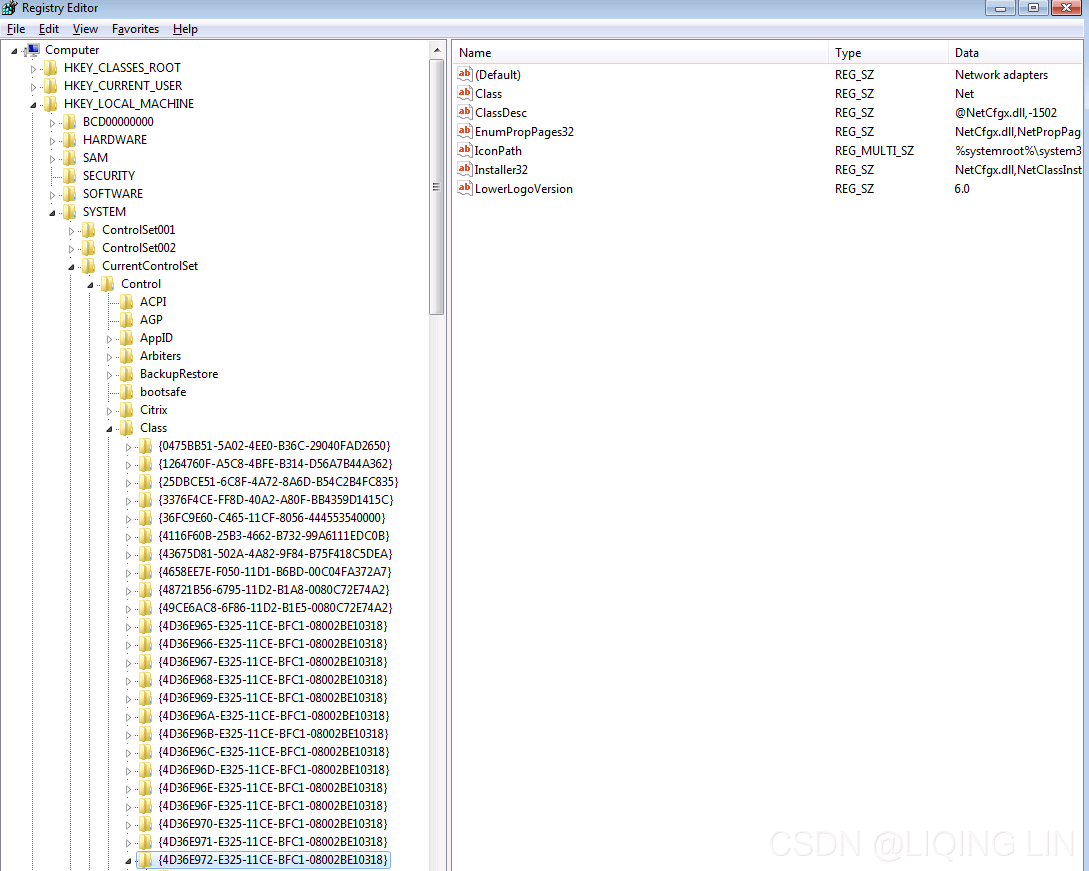

In [381]:
import winreg

# winreg.HKEY_LOCAL_MACHINE
#      Registry entries subordinate to this key define the physical state of the computer, 
#      including data about the bus type, system memory, and installed hardware and software.

hkey = winreg.OpenKey( winreg.HKEY_LOCAL_MACHINE, \
                       r'System\CurrentControlSet\Control\Class\{4d36e972-e325-11ce-bfc1-08002be10318}'
                     )
hkey # <PyHKEY at 0x1a130ad0>

In [382]:
keyInfo = winreg.QueryInfoKey( hkey )
keyInfo

(24, 7, 132737717659219844)

In [380]:
# Find the adapter name corresponding to the network card netCfgInstanceID
for index in range( keyInfo[0] ):
    hSubKeyName = winreg.EnumKey( hkey, index ) # ==> # 0000, 0001,...,0024, Properties
    if hSubKeyName == 'Properties':
        continue
    hSubKey = winreg.OpenKey(hkey, hSubKeyName)
    # <PyHKEY:0x0000000000000A9C>, <PyHKEY:0x0000000000000A94>, repeated...
    try:
        hNdiInfKey = winreg.OpenKey(hSubKey, r'Ndi\Interfaces')
        # <PyHKEY:0x0000000000000A9C>, <PyHKEY:0x0000000000000A94>, repeated...
        lowerRange = winreg.QueryValueEx(hNdiInfKey, 'LowerRange')
        
        # card manufacturer name and NIC name, Guid
        # ('ethernet', 1)
        if lowerRange[0] == 'ethernet':
            driverDesc = winreg.QueryValueEx(hSubKey, 'DriverDesc')[0]
            print('driver descritions:', driverDesc)
            # driverDesc
            # ('Marvell Yukon 88E8057 PCI-E Gigabit Ethernet Controller', 1)
            # ('DisplayLink Network Adapter NCM', 1)
            # ('TAP-Windows Adapter V9', 1)
            # ('Apple Mobile Device Ethernet', 1)
            
            # RootDevice's Data in the linkage
            netCfgInstanceID = winreg.QueryValueEx(hSubKey, 'NetCfgInstanceID')[0]
            print('Network adapter ID:', netCfgInstanceID, '\n')
            # netCfgInstanceID
            # ('{D622414E-F5F0-41F7-8907-1C0EDE2B5E24}', 1)
            # ('{A98CC15D-466E-4985-AB9F-7B84C71D5FCC}', 1)
            # ('{07D69288-DE47-4348-89D5-94D70DE90A9B}', 1)
            # ('{E0C996DE-475D-40A8-B8E5-EA4D483EE287}', 1)
            if netCfgInstanceID == None:
                print('The network adapter is not found, the program exits!')
                winreg.CloseKey(hNdiInfKey)
                exit()
            elif driverDesc=='DisplayLink Network Adapter NCM':
                winreg.CloseKey(hNdiInfKey)
                break
        winreg.CloseKey(hNdiInfKey)
    
    except:
        print('Message:', 'No Ndi\Interfaces Key')
        
winreg.CloseKey(hSubKey)
winreg.CloseKey(hkey)                                  

driver descritions: Marvell Yukon 88E8057 PCI-E Gigabit Ethernet Controller
Network adapter ID: {D622414E-F5F0-41F7-8907-1C0EDE2B5E24} 

driver descritions: DisplayLink Network Adapter NCM
Network adapter ID: {A98CC15D-466E-4985-AB9F-7B84C71D5FCC} 



In [469]:
# Set the IP by modifying the registry
# HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\services\{A98CC15D-466E-4985-AB9F-7B84C71D5FCC}\Parameters\Tcpip
strKeyName= r'SYSTEM\CurrentControlSet\services\{0}\Parameters\Tcpip'.format(netCfgInstanceID)
print( 'The registry address of the network adapter is:\n', strKeyName )

The registry address of the network adapter is:
 SYSTEM\CurrentControlSet\services\{A98CC15D-466E-4985-AB9F-7B84C71D5FCC}\Parameters\Tcpip


# 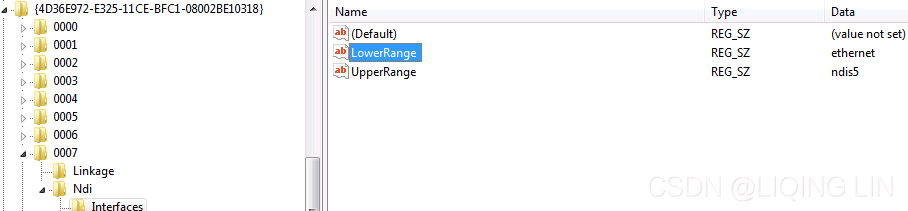
# Use the Registry Editor to change the permissions on the key to allow you as a user to have access. (if not, the following code will appear:
PermissionError: [WinError 5] Access is Denied )
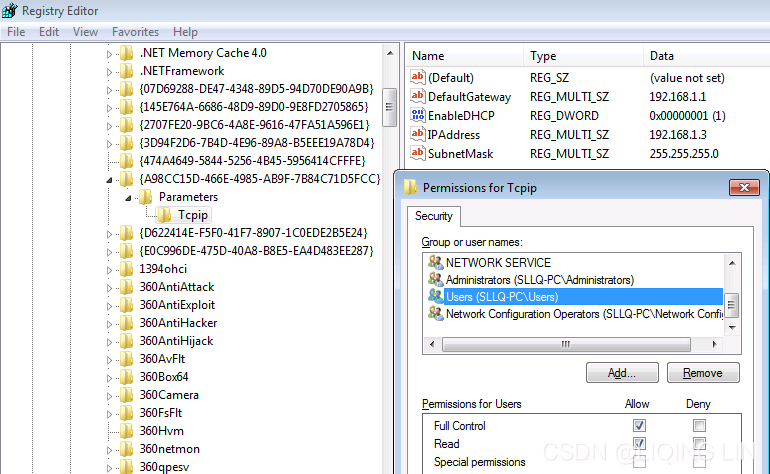

In [474]:
# Set the IP by modifying the registry
# HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\services\{A98CC15D-466E-4985-AB9F-7B84C71D5FCC}\Parameters\Tcpip
strKeyName= r'SYSTEM\CurrentControlSet\services\{0}\Parameters\Tcpip'.format(netCfgInstanceID)

hkey=winreg.OpenKey( winreg.HKEY_LOCAL_MACHINE,
                     strKeyName,
                     0,
                     winreg.KEY_ALL_ACCESS # (winreg.KEY_WOW64_64KEY + winreg.KEY_READ)
                   )
ip_data, ip_type = winreg.QueryValueEx( hkey, "IPAddress" ) 
subnetMask_data, subnetMask_type = winreg.QueryValueEx( hkey, "SubnetMask" )
defaultGateWay_data, defaultGateWay_type = winreg.QueryValueEx( hkey, "DefaultGateWay" )

print( ip_data, subnetMask_data, defaultGateWay_data )

winreg.SetValueEx(hkey, "IPAddress", 1, winreg.REG_MULTI_SZ, [new_ip])

ip_data, ip_type = winreg.QueryValueEx( hkey, "IPAddress" )
print( ip_data, subnetMask_data, defaultGateWay_data )

['192.168.1.10'] ['255.255.255.0'] ['192.168.1.1']
['192.168.1.215'] ['255.255.255.0'] ['192.168.1.1']


In [447]:
ip_data, ip_type = winreg.QueryValueEx( hkey, "IPAddress" ) 
subnetMask_data, subnetMask_type = winreg.QueryValueEx( hkey, "SubnetMask" )
defaultGateWay_data, defaultGateWay_type = winreg.QueryValueEx( hkey, "DefaultGateWay" )

print( ip_data[0], subnetMask_data[0], defaultGateWay_data[0] )

1 255.255.255.0 192.168.1.1
